# **Data Preprocessing with the Kaggle Titanic Dataset**

*By Carlos Santiago Bañón*

* **Year:** 2020
* **Technologies:** Python, Scikit-Learn, Pandas, NumPy, Matplotlib, Seaborn
* **Areas:** `data-analysis`, `data-preprocessing`, `feature-selection`, `titanic-dataset`
* **Description:** This notebook shows step-by-step how to preprocess the Kaggle Titanic dataset. The result is a preprocessed dataset saved as CSV files for use in various machine learning classification models.

## 1. Import Statements
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

## 2. Load the Data
---

For this notebook, we use the [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) dataset. The data is then hosted in the GitHub repository for this notebook.

In [2]:
# Import the data into a Pandas DataFrame.
train_df = pd.read_csv('https://bit.ly/2YtC2lh')
test_df = pd.read_csv('https://bit.ly/2MHDDRS')

In [3]:
# Show the train set.
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Show the test set.
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3. Data Analysis
---


### 3.1. Overview

To analyze the dataset, we first take a look at the features available and their data types.

In [5]:
# Show the features in the dataset.
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# Show the data type for each feature.
print('======== Training Set ========')
print(train_df.dtypes)
print('')
print('========== Test Set ==========')
print(test_df.dtypes)

======== Training Set ========
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

========== Test Set ==========
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


We then turn to empty values, converting them into `NaN` values to help with our computation.

In [7]:
# Replace empty values with 'NaN' for ease of computation.
train_df.replace('', np.nan)
test_df.replace('', np.nan)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# Check which features contain null values.
print('======== Training Set ========')
print(train_df.isnull().sum())
print('')
print('========== Test Set ==========')
print(test_df.isnull().sum())

======== Training Set ========
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

========== Test Set ==========
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 3.2. Statistical Properties

To better understand the numerical features, we then look at their statistical properties by using the `describe()` function.

In [9]:
# Select only the numerical features.
train_df_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]

# Show the properties.
train_df_num.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


For the categorical features, we can use the same function to get an excellent overview.

In [10]:
# Select only the categorical features and convert all to strings.
train_df_cat = train_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].astype(str)

In [11]:
# Show the properties.
train_df_cat.describe()

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,891,891
unique,891,2,3,891,2,681,148,4
top,190,0,3,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",male,1601,nan,S
freq,1,549,491,1,577,7,687,644


## 4. Feature Selection
---

### 4.1. Find Correlations

To perform feature selection, we first see if there is a significant correlation between the features and the `Survived` label.

#### 4.1.1. `Pclass`




First, let's check the relevance of the `Pclass` feature.

In [12]:
# Select only the samples where PClass = 1.
train_df_Pclass1 = train_df[train_df['Pclass'] == 1]

In [13]:
# Calculate the average survived ratio.
print('Average Survived Ratio =', train_df_Pclass1['Survived'].mean())

Average Survived Ratio = 0.6296296296296297


The average survived ratio among the group of `Pclass = 1` and `Survived` is 0.63. Therefore, we must include this feature in the predictive model, as there is a significant correlation.

#### 4.1.2. `Sex`

We then take a look at the importance of the `Sex` feature.

In [14]:
# Select only the samples where Sex = 'female'.
train_df_women = train_df[train_df['Sex'] == 'female']

In [15]:
# Calculate the average survived ratio.
print('Average Survived Ratio =', train_df_women['Survived'].mean())

Average Survived Ratio = 0.7420382165605095


Here, the average survived ratio among the group of `Sex = 'female'` and `Survived` is 0.74. Therefore, we must include this feature in the predictive model, as there is a significant correlation. From this, we can conclude women are more likely to have survived.

#### 4.1.3. `Age`

We also need to look at the correlation between `Age` and `Survived`. The following histogram helps us identify how useful the `Age` feature is.

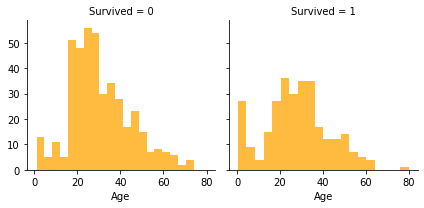

In [16]:
# Plot the histogram.
histogram = sns.FacetGrid(train_df, col='Survived')
histogram.map(plt.hist, 'Age', bins=20, color='orange', alpha=0.75);

From the histogram, we can conclude the following:
* Infants (`Age <= 4`) have a high survival rate.
* The oldest passengers (`Age = 80`) are likely to have survived.
* A large number of 15-25 year olds did not survive.
* Since both distributions are different, we should indeed consider `Age` in our model training.
* We should band age groups, as they are not equally distributed.

#### 4.1.4. `Age` and `Pclass`

Further, we can combine the `Age` and `Pclass` features to see their combined effect on `Survived`.

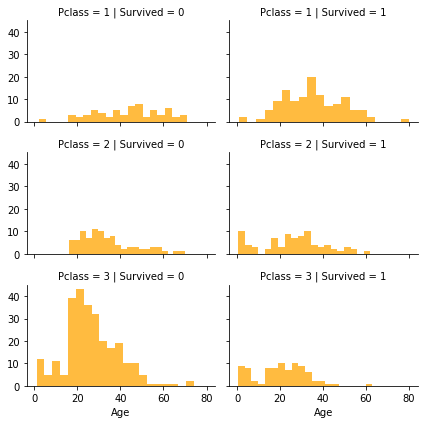

In [17]:
# Plot the histogram.
histogram = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2, aspect=1.5)
histogram.map(plt.hist, 'Age', bins=20, color='orange', alpha=0.75);


From the histogram, we can conclude the following:

* Most of those in `Pclass = 3` did not survive.
* Most infants in `Pclass = 2` and `Pclass = 3` survived.
* Most passengers in `Pclass = 1` survived.
* `Pclass` does indeed vary in terms of the `Age` distribution.
* Based on these observations, `Pclass` should indeed be used for the model training.

#### 4.1.5. `Fare`

We should also check if higher fare-paying passangers had higher chance of survival.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


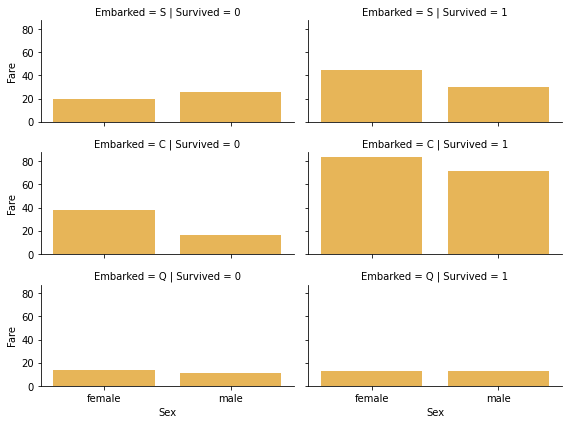

In [18]:
# Plot the bar plot.
bar_plot = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2, aspect=2)
bar_plot.map(sns.barplot, 'Sex', 'Fare', ci=None, color='orange', alpha=0.75);

From the bar plot, we can conclude the following:
* Higher `Fare` paying passengers are more likely to have survived.
* We should indeed band `Fare` data, as they are not equally distributed.

#### 4.1.6. `Ticket`

Now we take a look at some features we can drop, starting with the `Ticket` feature. More specifically, we first look at the correleation between `Ticket` and `Survived`.

In [19]:
# Get the total number of tickets.
train_df_tickets = train_df[['Ticket']]
total_tickets = train_df_tickets.count()[0]

# Get the number of unique tickets.
train_df_tickets = train_df_tickets.drop_duplicates()
unique_tickets = train_df_tickets.count()[0]

# Get the rate of duplicates.
duplicates_rate = (total_tickets - unique_tickets) / total_tickets
print("Rate of Ticket Duplicates:", duplicates_rate)

Rate of Ticket Duplicates: 0.2356902356902357


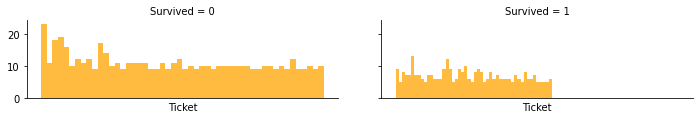

In [20]:
# Plot a histogram to check for a correlation.
tickets = train_df[['Ticket', 'Survived']]
histogram = sns.FacetGrid(tickets, col='Survived', height=2, aspect=2.5)
histogram.map(plt.hist, 'Ticket', bins=50, color='orange', alpha=0.75);
histogram.set(xticklabels=[])
histogram.set(xticks=[]);

Our rate of duplicates is 0.24, so roughly a quarter of all tickets are duplicated. Further, the histogram above shows that there is no significant correlation between `Ticket` and `Survived`, and thus the feature can be dropped.

In [21]:
# Drop the Ticket feature.
train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

#### 4.1.7. `Cabin`

Finally, we take a look at the `Cabin` feature.

In [22]:
# Get the number of null cabins.
null_cabins = train_df['Cabin'].isnull().sum() + test_df['Cabin'].isnull().sum()
print('Null Values (Cabin) =', null_cabins)

Null Values (Cabin) = 1014


We have 1014 null values in the `Cabin` feature. Therefore, the feature can be dropped.

In [23]:
# Drop the Cabin feature.
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

### 4.2. Address Missing Values

#### 4.2.1. `Age`

We can also complete the missing values in the `Age` feature by imputing them using the *k*-nearest neighbors algorithm.

In [24]:
# Prepare the Age training values.
X_train = train_df['Age'].values
X_train = X_train.reshape(-1, 1)

In [25]:
# Prepare the Age test values.
X_test = test_df['Age'].values
X_test = X_test.reshape(-1, 1)

In [26]:
# Run the k-NN algorithm on the training set for Age.
imputer = KNNImputer(n_neighbors=5)
Xtrans = imputer.fit_transform(X_train)
train_df = pd.concat([pd.DataFrame(Xtrans), train_df], axis=1)

# Replace the old Age feature.
del train_df['Age']
train_df.rename(columns={0:'Age'}, inplace=True)

In [27]:
# Run the k-NN algorithm on the test set for Age.
imputer = KNNImputer(n_neighbors=5)
Xtrans = imputer.fit_transform(X_test)
test_df = pd.concat([pd.DataFrame(Xtrans), test_df], axis=1)

# Replace the old Age feature.
del test_df['Age']
test_df.rename(columns={0:'Age'}, inplace=True)

In [28]:
# Ensure there are no 'NaN' values in the training set.
train_df.Age.hasnans

False

In [29]:
# Ensure there are no 'NaN' values in the test set.
test_df.Age.hasnans

False

#### 4.2.2. `Embarked`

Further, we complete the missing values in the `Embarked` feature, using the mode.

In [30]:
# Replace missing values with mode in Embarked.
print('======== Training Set ========')
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
print(train_df.isnull().sum())
print('')
print('========== Test Set ==========')
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
print(test_df.isnull().sum())

======== Training Set ========
Age            0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

========== Test Set ==========
Age            0
PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


#### 4.2.3. `Fare`

Finally, we complete the `Fare` feature using the mode.

In [31]:
# Replace missing values with mode in Fare.
print('========== Test Set ==========')
test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)
print(test_df.isnull().sum())

========== Test Set ==========
Age            0
PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


### 4.3. Map Categorical Features to Numbers

#### 4.3.1. `Sex`

Our next step is to map categorical features to numbers. To do this, we first convert the values in `Sex` to numerical values. For this, we create a new `Gender` feature where `female = 1` and `male = 0`.

In [32]:
# Creat a new feature based on Sex.
gender_map = {'male': 0,'female': 1}
train_gender = [gender_map[item] for item in train_df.Sex] 
train_df['Gender'] = train_gender
test_gender = [gender_map[item] for item in test_df.Sex] 
test_df['Gender'] = test_gender

In [33]:
# Drop the Sex feature.
train_df.drop('Sex', axis=1, inplace=True)
test_df.drop('Sex', axis=1, inplace=True)

In [34]:
# Show the training set.
train_df

,Age,PassengerId,Survived,Pclass,Name,SibSp,Parch,Fare,Embarked,Gender
0,22.000000,1,0,3,"Braund, Mr. Owen Harris",1,0,7.2500,S,0
1,38.000000,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,71.2833,C,1
2,26.000000,3,1,3,"Heikkinen, Miss. Laina",0,0,7.9250,S,1
3,35.000000,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,53.1000,S,1
4,35.000000,5,0,3,"Allen, Mr. William Henry",0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,887,0,2,"Montvila, Rev. Juozas",0,0,13.0000,S,0
887,19.000000,888,1,1,"Graham, Miss. Margaret Edith",0,0,30.0000,S,1
888,29.699118,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,23.4500,S,1
889,26.000000,890,1,1,"Behr, Mr. Karl Howell",0,0,30.0000,C,0


In [35]:
# Show the test set.
test_df

,Age,PassengerId,Pclass,Name,SibSp,Parch,Fare,Embarked,Gender
0,34.50000,892,3,"Kelly, Mr. James",0,0,7.8292,Q,0
1,47.00000,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,7.0000,S,1
2,62.00000,894,2,"Myles, Mr. Thomas Francis",0,0,9.6875,Q,0
3,27.00000,895,3,"Wirz, Mr. Albert",0,0,8.6625,S,0
4,22.00000,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...
413,30.27259,1305,3,"Spector, Mr. Woolf",0,0,8.0500,S,0
414,39.00000,1306,1,"Oliva y Ocana, Dona. Fermina",0,0,108.9000,C,1
415,38.50000,1307,3,"Saether, Mr. Simon Sivertsen",0,0,7.2500,S,0
416,30.27259,1308,3,"Ware, Mr. Frederick",0,0,8.0500,S,0


#### 4.3.2. `Embarked`

We can also use a similar process to map the `Embarked` feature to numbers.

In [36]:
# Create a new feature based on Embarked.
port_map = {'C': 0,'Q': 1, 'S': 2}
train_df['Port'] = [port_map[item] for item in train_df.Embarked] 
test_df['Port'] = [port_map[item] for item in test_df.Embarked]

In [37]:
# Drop the Embarked feature.
train_df.drop('Embarked', axis=1, inplace=True)
test_df.drop('Embarked', axis=1, inplace=True)

### 4.4. Band Continuous Features

Another useful step to take is to band the continuous features. More specifically, here we band the `Fare` and `Age` features.

In [38]:
# Convert Fare into ordinal values.
fare_bands = np.array([-0.001, 7.91, 14.454, 31.0, 512.3292])
train_df['Fare'] = pd.cut(train_df['Fare'], fare_bands, labels=[0, 1, 2, 3])
test_df['Fare'] = pd.cut(test_df['Fare'], fare_bands, labels=[0, 1, 2, 3])

In [39]:
# Convert Age into ordinal values.
age_bands = np.array([0, 5, 15, 30, 40, 55, 65, 80])
train_df['Age'] = pd.cut(train_df['Age'], age_bands, labels=[0, 1, 2, 3, 4, 5, 6])
test_df['Age'] = pd.cut(test_df['Age'], age_bands, labels=[0, 1, 2, 3, 4, 5, 6])

### 4.5. Drop the Remaining String-Based Features

Intuitively, it is also clear that the `Name` and `PassengerId` string-based features will not affect survival, and thus can be dropped.

In [40]:
# Drop the Name feature.
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [41]:
# Drop the PassengerId feature.
train_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)

### 4.6. Use a Decision Tree Classifier for Feature Importance

Finally, we can use a decision tree classifier to see which of the remaining features are truly important.

In [42]:
# Prepare the features.
X_train = train_df.drop('Survived', axis=1, inplace=False).to_numpy()
Y_train = train_df[['Survived']].to_numpy()

In [43]:
# Run the classifier.
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train.ravel())

In [44]:
# See the importances.
importance = clf.feature_importances_
for i, v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i, v))

Feature: 0, Score: 0.14182
Feature: 1, Score: 0.16443
Feature: 2, Score: 0.10788
Feature: 3, Score: 0.05097
Feature: 4, Score: 0.05954
Feature: 5, Score: 0.42463
Feature: 6, Score: 0.05073


In [45]:
# See the training set.
train_df.drop('Survived', axis=1, inplace=False)

,Age,Pclass,SibSp,Parch,Fare,Gender,Port
0,2,3,1,0,0,0,2
1,3,1,1,0,3,1,0
2,2,3,0,0,1,1,2
3,3,1,1,0,3,1,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
886,2,2,0,0,1,0,2
887,2,1,0,0,2,1,2
888,2,3,1,2,2,1,2
889,2,1,0,0,2,0,0


From the classifier, we can see that both the `Port` and `Parch` features are not very important, and thus can be dropped.

In [46]:
# Drop the Port feature.
train_df.drop('Port', axis=1, inplace=True)
test_df.drop('Port', axis=1, inplace=True)

In [47]:
# Drop the Parch feature.
train_df.drop('Parch', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)

## 5. Save the Preprocessed Data
---

Now that our data is ready, we can save it as CSV files. These are stored in the GitHub repository for this notebook and are used in further notebooks.

In [48]:
# Show the preprocessed training set.
train_df

,Age,Survived,Pclass,SibSp,Fare,Gender
0,2,0,3,1,0,0
1,3,1,1,1,3,1
2,2,1,3,0,1,1
3,3,1,1,1,3,1
4,3,0,3,0,1,0
...,...,...,...,...,...,...
886,2,0,2,0,1,0
887,2,1,1,0,2,1
888,2,0,3,1,2,1
889,2,1,1,0,2,0


In [49]:
# Show the preprocessed test set.
test_df

,Age,Pclass,SibSp,Fare,Gender
0,3,3,0,0,0
1,4,3,1,0,1
2,5,2,0,1,0
3,2,3,0,1,0
4,2,3,1,1,1
...,...,...,...,...,...
413,3,3,0,1,0
414,3,1,0,3,1
415,3,3,0,0,0
416,3,3,0,1,0


In [50]:
# Save the training set as a CSV file.
train_df.to_csv('train_preprocessed.csv')

In [51]:
# Save the test set as a CSV file.
test_df.to_csv('test_preprocessed.csv')